In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [8]:
outs_dict = torch.load('inference_outs.pth')
outs_dict.keys(), outs_dict['superglue_correspondences'].shape, outs_dict['flownet_correspondences'].shape, outs_dict['matches'].shape,outs_dict['inputs']['image1'].shape 



(dict_keys(['inputs', 'keypoints', 'superglue_correspondences', 'superglue_scores', 'flownet_correspondences', 'image1_depth', 'image2_depth', 'matches']),
 (344, 4),
 (6000, 4),
 (6000, 4),
 (256, 832, 3))

In [9]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
superglue_correspondences = outs_dict['superglue_correspondences']
matches = outs_dict['matches']

h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

superglue_correspondences[:10], h, w, matches[:10]

(array([[257.,   9., 234.,   8.],
        [540.,   9., 520.,   9.],
        [313.,  10., 289.,   8.],
        [189.,  11., 162.,   9.],
        [778.,  12., 750.,  11.],
        [748.,  13., 722.,  11.],
        [293.,  15., 271.,  12.],
        [529.,  16., 509.,  13.],
        [737.,  16., 711.,  15.],
        [154.,  17., 124.,  14.]], dtype=float32),
 256.0,
 416.0,
 array([[257.,   9., 234.,   8.],
        [540.,   9., 520.,   9.],
        [313.,  10., 289.,   8.],
        [189.,  11., 162.,   9.],
        [778.,  12., 750.,  11.],
        [748.,  13., 722.,  11.],
        [293.,  15., 271.,  12.],
        [529.,  16., 509.,  13.],
        [737.,  16., 711.,  15.],
        [154.,  17., 124.,  14.]], dtype=float32))

SuperGlue keypoints and matches

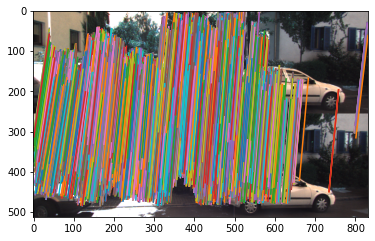

In [11]:
import random
plt.imshow(cat_images, aspect='equal')

flownet_correspondences = outs_dict['flownet_correspondences']

for i in range(flownet_correspondences.shape[0]-1):
    idx = random.randint(0, flownet_correspondences.shape[0])
    plt.plot([flownet_correspondences[idx][0], flownet_correspondences[idx][2]], [flownet_correspondences[idx][1], flownet_correspondences[idx][3] + h])

plt.savefig('flownet_correspondences.png')

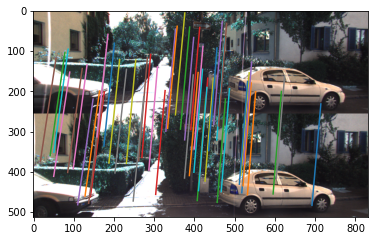

In [13]:
import random
plt.imshow(cat_images, aspect='equal')

for i in range(50):
    idx = random.randint(0, matches.shape[0])
    plt.plot([matches[idx][0], matches[idx][2]], [matches[idx][1], matches[idx][3] + h])

plt.savefig('superglueflow_sampled_correspondence_out.png')